In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

## Data Preprocessing

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df = df.drop('salary',axis=1)

In [5]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


## Label Encoding Categorical Variabes

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
features_to_encode = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [8]:
for col in features_to_encode:
    one_hot_encoded = pd.get_dummies(df[col], prefix=col)
    df.drop(col,axis=1,inplace=True)
    df= pd.concat([df,one_hot_encoded],axis=1)

In [9]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,False,True,False,True,...,False,False,False,True,True,False,False,True,False,True
1,2,79.33,78.33,77.48,86.5,66.28,False,True,True,False,...,True,False,False,True,False,True,True,False,False,True
2,3,65.00,68.00,64.00,75.0,57.80,False,True,True,False,...,False,True,False,False,True,False,True,False,False,True
3,4,56.00,52.00,52.00,66.0,59.43,False,True,True,False,...,True,False,False,True,True,False,False,True,True,False
4,5,85.80,73.60,73.30,96.8,55.50,False,True,True,False,...,False,True,False,False,True,False,True,False,False,True


In [10]:
df = df.astype(int)

In [11]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67,91,58,55,58,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
1,2,79,78,77,86,66,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1
2,3,65,68,64,75,57,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
3,4,56,52,52,66,59,0,1,1,0,...,1,0,0,1,1,0,0,1,1,0
4,5,85,73,73,96,55,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1


In [12]:
placed_column = 'status_Placed'
not_placed_column = 'status_Not Placed'


df['target'] = df.apply(lambda row: 1 if row[placed_column] == 1 else 0, axis=1)


df.drop([placed_column, not_placed_column], axis=1, inplace=True)

In [13]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,target
0,1,67,91,58,55,58,0,1,0,1,...,1,0,0,0,1,1,0,0,1,1
1,2,79,78,77,86,66,0,1,1,0,...,0,1,0,0,1,0,1,1,0,1
2,3,65,68,64,75,57,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
3,4,56,52,52,66,59,0,1,1,0,...,0,1,0,0,1,1,0,0,1,0
4,5,85,73,73,96,55,0,1,1,0,...,1,0,1,0,0,1,0,1,0,1


C:\Users\prati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


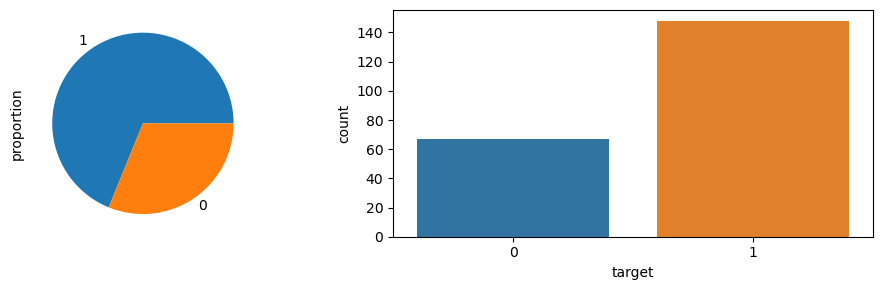

In [14]:
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= df["target"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df["target"])
plt.tight_layout()
plt.show()

C:\Users\prati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

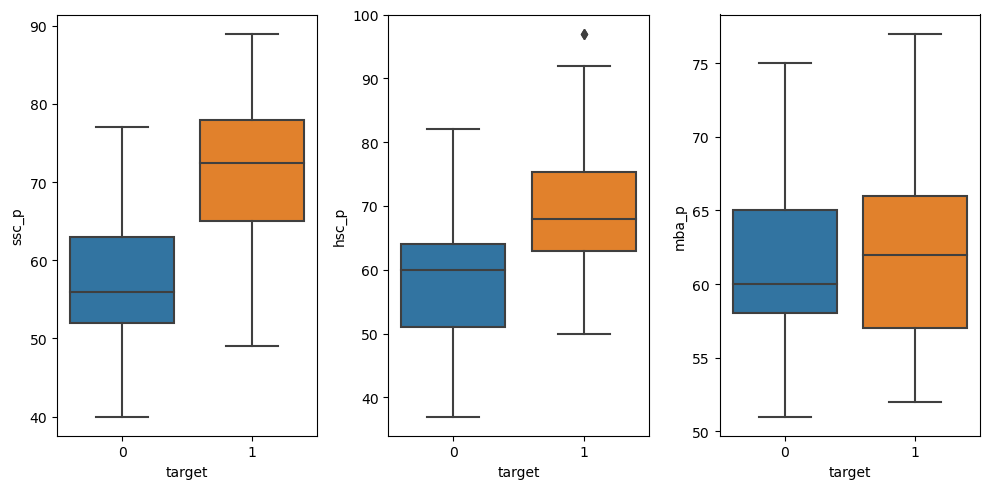

In [15]:
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=df["target"],y=df["ssc_p"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=df["target"],y=df["hsc_p"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=df["target"],y=df["mba_p"])
plt.tight_layout()
plt.show()

## Train Test Split

In [16]:
X = df.drop(['sl_no','target'],axis=1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (172, 21)
X_test shape (43, 21)
y_train shape (172,)
y_test shape (43,)


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model - Binary Classification

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[29  2]
 [ 3  9]]


## Random Forest Classification

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
random_forest_regressor = RandomForestClassifier(n_estimators=100,random_state=42)

In [51]:
random_forest_regressor.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred_random_forest = random_forest_regressor.predict(X_test_scaled)

In [53]:
accuracy = accuracy_score(y_test, y_pred_random_forest)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [54]:
matrix_random_forest = confusion_matrix(y_test,y_pred_random_forest, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[29  2]
 [ 3  9]]
